In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 stratify=cancer.target,random_state=42)
d_tree = DecisionTreeClassifier(random_state=0)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
print("Training Set Accuracy: {}".format(d_tree.score(X_train,y_train)))
print("Test Set Accuracy: {}".format(d_tree.score(X_test,y_test)))

Training Set Accuracy: 1.0
Test Set Accuracy: 0.9370629370629371


In [6]:
d_tree_1 = DecisionTreeClassifier(max_depth=4,random_state=0)
d_tree_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [7]:
print("Training Set Accuracy: {}".format(d_tree_1.score(X_train,y_train)))
print("Test Set Accuracy: {}".format(d_tree_1.score(X_test,y_test)))

Training Set Accuracy: 0.9882629107981221
Test Set Accuracy: 0.951048951048951


In [8]:
from sklearn.tree import export_graphviz
export_graphviz(d_tree_1,out_file = 'tree.dot',class_names=["malignant","benign"],
                feature_names=cancer.feature_names,impurity=False,filled=True)

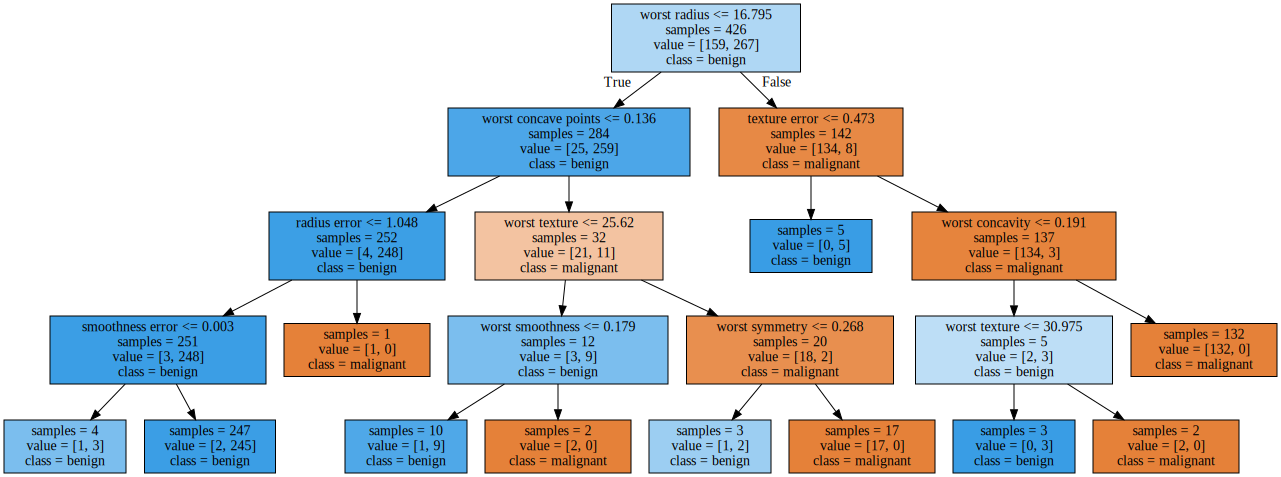

In [9]:
import graphviz
with open ("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
print("Feature Importances:\n{}".format(d_tree_1.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


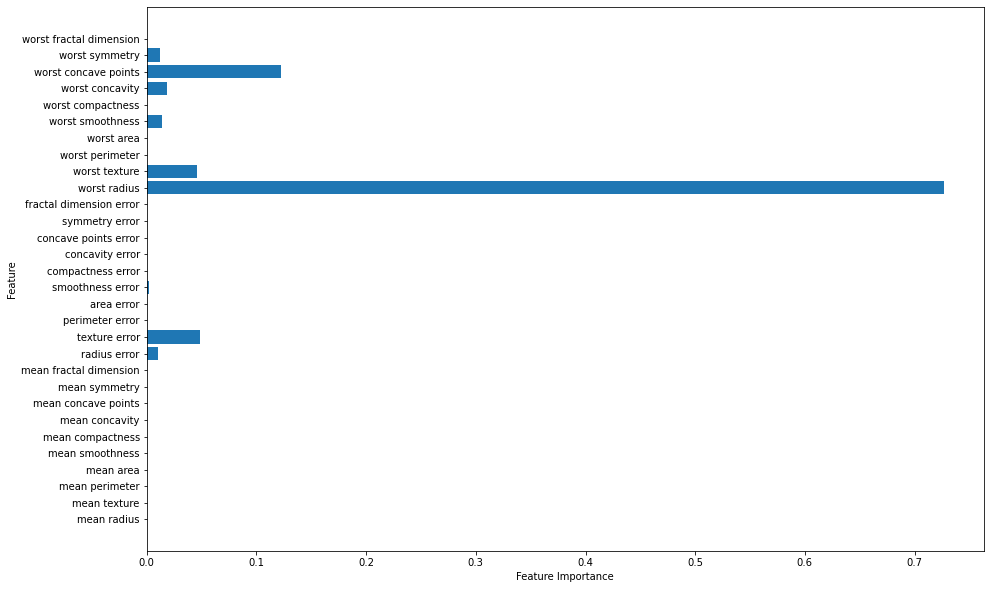

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(d_tree_1)

Feature importances: [0. 1.]


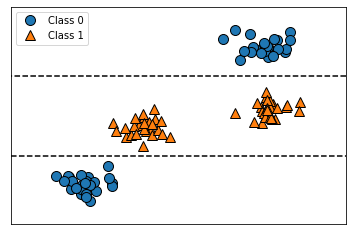

In [12]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()